Merging Data Frames

In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
#Loading in a new pivot table of software developer jobs
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month') 

df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
#Creating a pivot table of number of jobs per month 

df_us = df[df['job_country'] == 'United States'].copy()
unique_df = df_us.drop_duplicates(['job_title','company_name'])
unique_df['job_posted_month'] = unique_df['job_posted_date'].dt.strftime('%B')
df_pivot = unique_df.pivot_table(index='job_posted_month', columns='job_title_short',aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot['month_no'] = pd.to_datetime(df_pivot['job_posted_month'], format='%B').dt.month
df_pivot.sort_values('month_no', inplace=True)
df_pivot.set_index('job_posted_month',inplace=True)
df_pivot.drop(columns='month_no', inplace=True)

df_pivot



C:\Users\mitta\AppData\Local\Temp\ipykernel_16132\2974211912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['job_posted_month'] = unique_df['job_posted_date'].dt.strftime('%B')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,447,30,5250,1725,3931,57,971,432,870,99
February,357,20,3679,1856,2682,51,700,496,589,70
March,366,19,3764,2007,2592,53,683,488,615,92
April,486,36,3607,1681,2531,41,605,427,469,103
May,243,18,2865,1787,2267,41,497,453,464,83
June,380,30,3374,1825,2530,39,565,491,575,74
July,493,36,3268,1625,2654,55,551,445,611,133
August,769,35,4130,2045,3343,53,752,508,841,169
September,807,46,3202,2190,2804,98,572,493,589,190


In [10]:
df_merged = df_pivot.merge(df_us_software_pivot, on='job_posted_month')
df_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,447,30,5250,1725,3931,57,971,432,870,99,13619,9827,5108,4348
February,357,20,3679,1856,2682,51,700,496,589,70,11456,9116,7298,4284
March,366,19,3764,2007,2592,53,683,488,615,92,11102,8178,5814,4159
April,486,36,3607,1681,2531,41,605,427,469,103,14037,9209,7232,4220
May,243,18,2865,1787,2267,41,497,453,464,83,12126,8864,6718,4980
June,380,30,3374,1825,2530,39,565,491,575,74,12003,8065,5902,4781
July,493,36,3268,1625,2654,55,551,445,611,133,11914,8061,6839,4344
August,769,35,4130,2045,3343,53,752,508,841,169,11571,8191,7413,4104
September,807,46,3202,2190,2804,98,572,493,589,190,14016,8447,6139,4094


In [ ]:
top_5 = (df_merged
.sum() #Sum of jobs every month 
.sort_values(ascending=False) #sorts values in descending order
.head(). #shows top 5 values
index. #extracts the index 
tolist() #turns index into a list
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

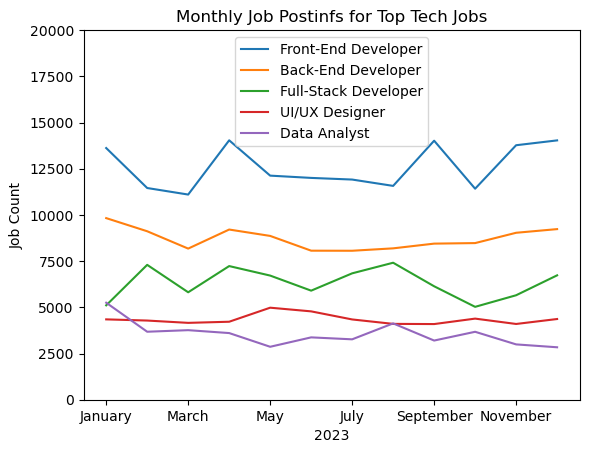

In [24]:
df_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postinfs for Top Tech Jobs')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.legend()
plt.show()